# Credit Card Fraud Detection (Classification Models + SMOTE with RandomUnderSampler):

### 1. Import

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Import the dataset
dataset = pd.read_csv("creditcard.csv")

### 2. Creating the model

In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.27, random_state = 1)

In [6]:
from collections import Counter
# Summarize Class Distribution
counter = Counter(y_train)
print(counter)

Counter({0: 207544, 1: 365})


### 3. Oversampling and undersampling using RandomUnderSampler:
In this exercise, we have performed oversampling and undersampling of the same classes using the RandomUnderSampler class from the imbalanced-learn library.
We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class, then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class.
To implement this, we can specify the desired ratios as arguments to the SMOTE and RandomUnderSampler classes, and then chain them together using a pipeline, for example:

In [21]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling. The pipeline can then be fit and applied to our dataset just like a single transform

In [22]:
X_res, y_res = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_res)
print(counter)

Counter({0: 41508, 1: 20754})


In [23]:
#Convert X_train and y_train to these values 
X_train, y_train = X_res, y_res

### 4. Create the Classifier models: 
To achieve this, we used Decision Tree, Random Forest, Logistic Regression, KNN, Linear SVM and Naive Bayes, just like before:

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1),
    "Decision Tree Classifier": DecisionTreeClassifier(criterion = 'gini', random_state = 1),
    "Logistic Regression": LogisticRegression(random_state = 1),
    "KNN": KNeighborsClassifier(n_neighbors = 3),
    "Linear SVM": LinearSVC(),
    "Naive Bayes Classifier": GaussianNB()
}

%%%%%%%%%%%%%%%%%%%% Random Forest Classifier %%%%%%%%%%%%%%%%%%%%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41508
           1       1.00      1.00      1.00     20754

    accuracy                           1.00     62262
   macro avg       1.00      1.00      1.00     62262
weighted avg       1.00      1.00      1.00     62262

Confusion Matrix:


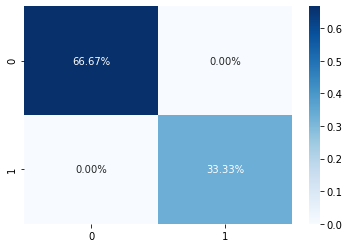

Accuracy Score: 100.0%
Precision Score: 1.0
Recall Score: 0.9998554495518936
F1 Score: 0.9999277195518612
%%%%%%%%%%%%%%%%%%%% Decision Tree Classifier %%%%%%%%%%%%%%%%%%%%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41508
           1       1.00      1.00      1.00     20754

    accuracy                           1.00     62262
   macro avg       1.00      1.00      1.00     62262
weighted avg       1.00      1.00      1.00     62262

Confusion Matrix:


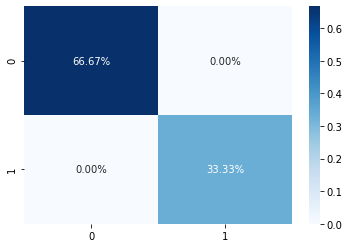

Accuracy Score: 100.0%
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
%%%%%%%%%%%%%%%%%%%% Logistic Regression %%%%%%%%%%%%%%%%%%%%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     41508
           1       0.98      0.91      0.94     20754

    accuracy                           0.96     62262
   macro avg       0.97      0.95      0.96     62262
weighted avg       0.96      0.96      0.96     62262

Confusion Matrix:


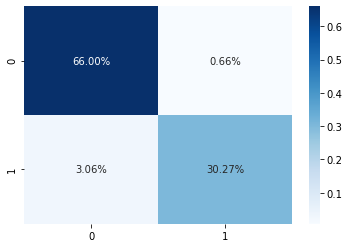

Accuracy Score: 96.3%
Precision Score: 0.9786074043304429
Recall Score: 0.9081140984870386
F1 Score: 0.9420438357533801
%%%%%%%%%%%%%%%%%%%% KNN %%%%%%%%%%%%%%%%%%%%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41508
           1       0.99      1.00      1.00     20754

    accuracy                           1.00     62262
   macro avg       1.00      1.00      1.00     62262
weighted avg       1.00      1.00      1.00     62262

Confusion Matrix:


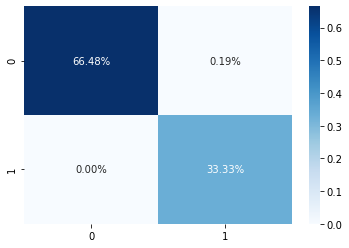

Accuracy Score: 99.8%
Precision Score: 0.9944417824628654
Recall Score: 1.0
F1 Score: 0.9972131462617722
%%%%%%%%%%%%%%%%%%%% Linear SVM %%%%%%%%%%%%%%%%%%%%


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     41508
           1       0.98      0.89      0.94     20754

    accuracy                           0.96     62262
   macro avg       0.96      0.94      0.95     62262
weighted avg       0.96      0.96      0.96     62262

Confusion Matrix:


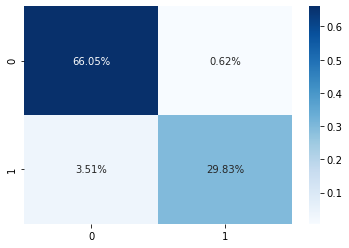

Accuracy Score: 95.89999999999999%
Precision Score: 0.9797404241848686
Recall Score: 0.8947672737785487
F1 Score: 0.9353278936234513
%%%%%%%%%%%%%%%%%%%% Naive Bayes Classifier %%%%%%%%%%%%%%%%%%%%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     41508
           1       0.95      0.86      0.90     20754

    accuracy                           0.94     62262
   macro avg       0.94      0.92      0.93     62262
weighted avg       0.94      0.94      0.94     62262

Confusion Matrix:


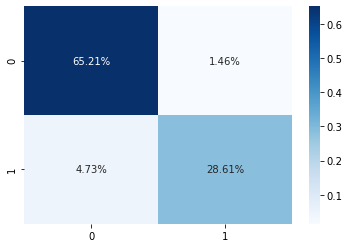

Accuracy Score: 93.8%
Precision Score: 0.9514957264957264
Recall Score: 0.8582441938903344
F1 Score: 0.9024674469270912


In [25]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
def calculations(X_test, y_test, classifier):
    y_pred = classifier.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm/np.sum(cm), annot = True, fmt='.2%', cmap = "Blues")
    plt.show()
    print("Accuracy Score: {}%".format(np.round(accuracy_score(y_test, y_pred), 3) * 100))
    print("Precision Score: {}".format(precision_score(y_test, y_pred)))
    print("Recall Score: {}".format(recall_score(y_test, y_pred)))
    print("F1 Score: {}".format(f1_score(y_test, y_pred)))

for i, (cname, classifier) in enumerate(classifiers.items()):
    print("%%%%%%%%%%%%%%%%%%%% {} %%%%%%%%%%%%%%%%%%%%".format(cname))
    classifier.fit(X_res, y_res)
    calculations(X_train, y_res, classifier)

### Observations:
1. The accuracy of the classifiers are as follows:
    Random Forest = 100%
    Decision Tree = 100%
    Logistic Regression = 96.3%
    KNN = 99.8%
    Linear SVM = 96.0%
    Naive Bayes Classifier = 93.89%
2. The results shown are much better than the earlier program using only SMOTE!